Notebook to run the WGCNA calling for the functions from the py file. To implement once the method is functioning correctly

In [1]:
### GENERAL CONFIGURATION FOR THE ANALYSIS:
# Imports
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append(os.getcwd().strip('notebooks') + 'src/')
import WGCNA_functions as wgcnax



# Colors for the terminal outputs
ENDC = "\033[0m"
BOLD = "\033[1m"
UNDERLINE = "\033[4m"

OKBLUE = "\033[94m"
OKGREEN = "\033[92m"
WARNING = "\033[93m"
FAIL = "\033[91m"

# Adjacency type affects how the adjacency matrix is calculated. The signed method, im not sure if it makes sense
adjacency_type = "unsigned"

# SETTINGS FOR PLOTTING FIGURES
PLOTS_WANTED = True
dpi_general = 150


In [2]:
### LOADING REAL UNPUBLISHED DATA    -     NO PUSHING FOR THE RESULTS

# Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')
data_dir = working_dir + 'data/PROTECTED_DATA/BGI_Expression_Data/'



## Load the dataset
# Transcriptomics Data - We assume a dataset structure were col are the genes, and rows are the samples
# transcriptomics_dataset_dir = data_dir + 'CRC.SW.mRNA.symbol.count.csv'  
# transcriptomics_dataset = pd.read_csv(transcriptomics_dataset_dir, index_col=0)

# Transcriptomics Data - We assume a dataset structure were col are the genes, and rows are the samples
transcriptomics_TPM_dataset_dir = data_dir + 'CRC.SW.mRNA.symbol.TPM.csv'  
transcriptomics_dataset = pd.read_csv(transcriptomics_TPM_dataset_dir, index_col=0)

# Sample info and Clinical Traits Data
# Sample info and Clinical Traits Data
sample_info_traits_dir = data_dir + 'Sample_Info_Selection.csv'
trait_dataset = pd.read_csv(sample_info_traits_dir)
trait_dataset


# Figures Saving output dir
figures_dir = working_dir + 'results/WGCNA_figures_BGI_TPM_prepro_newparam/'

# Check if the directory exists, and if not, create it
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"{BOLD}{OKBLUE}Creating directory to save results and figures...{ENDC}")


## Make a subset to save RAM
subset_dataset_size = 2000
transcriptomics_dataset = transcriptomics_dataset.iloc[:, :subset_dataset_size] 

# RAM usage estimation in GB
RAM_estimate = (subset_dataset_size * subset_dataset_size * 8) / (1024**3)
print(f"The aproximated RAM to analyse this size of dataset is: {RAM_estimate} GB")


The aproximated RAM to analyse this size of dataset is: 0.029802322387695312 GB


AttributeError: module 'WGCNA_functions' has no attribute 'simple_preprocess'

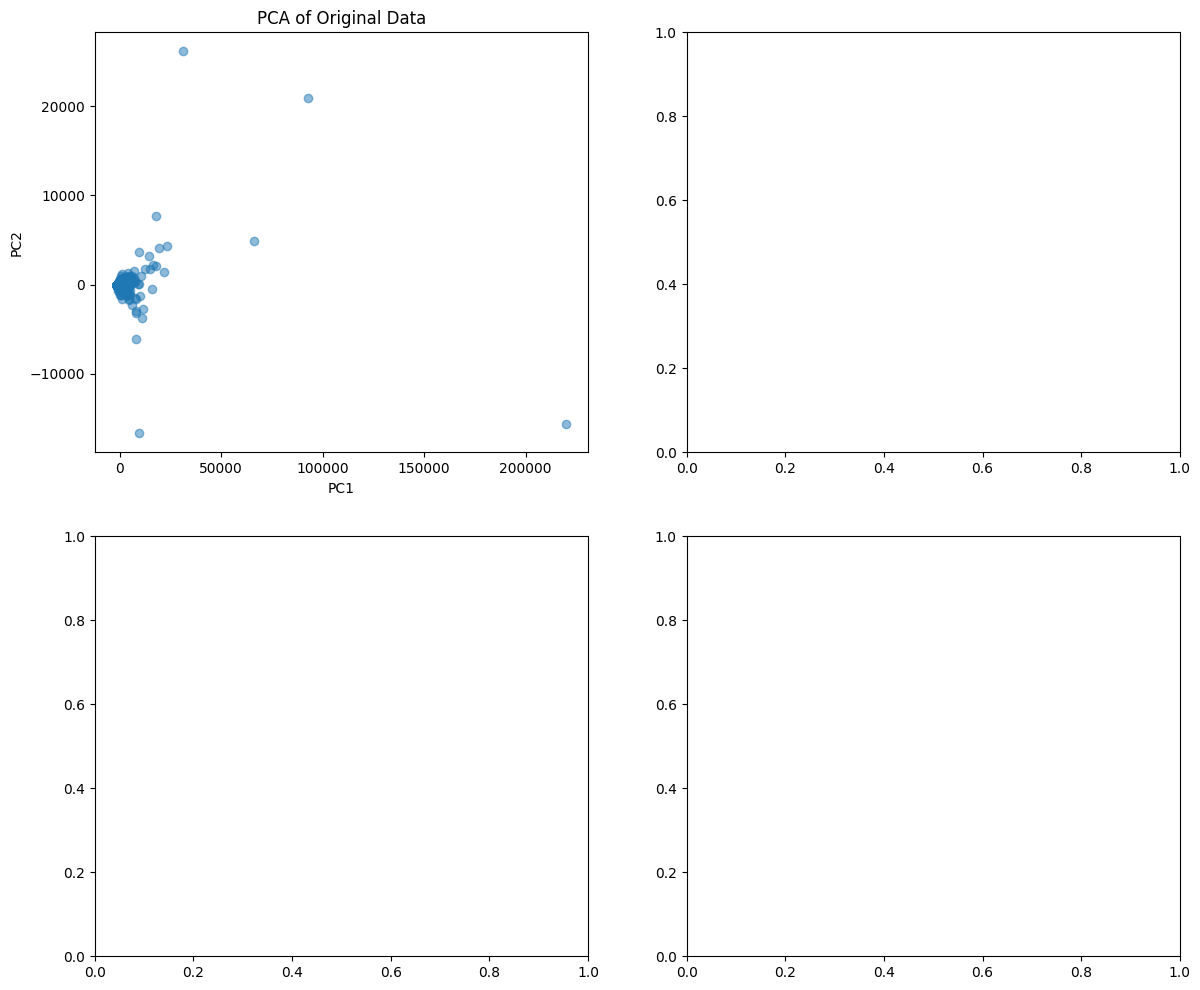

In [3]:
### Step 1: Data Preprocessing (Normalization)


# Visualize original and preprocessed data with PCA
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot each PCA visualization
wgcnax.plot_pca(transcriptomics_dataset, title='PCA of Original Data', ax=axs[0, 0])
wgcnax.plot_pca(wgcnax.simple_preprocess(transcriptomics_dataset), title='PCA of Preprocessed with simple_preprocess', ax=axs[0, 1])
wgcnax.plot_pca(wgcnax.preprocess_TPM(transcriptomics_dataset), title='PCA of Preprocessed with preprocess_TPM', ax=axs[1, 0])
wgcnax.plot_pca(wgcnax.preprocess_TPM_outlier_deletion(transcriptomics_dataset), title='PCA of Preprocessed with preprocess_TPM_outlier_deletion', ax=axs[1, 1])
plt.tight_layout()
plt.show()




# Pick the preprocessing to actually use:
transcriptomics_dataset_filtered = wgcnax.preprocess_TPM_outlier_deletion(transcriptomics_dataset)


print(f"{BOLD}{OKBLUE}Done...{ENDC}")